# IMDB

*Задача:* бинарная классификация фильмов на положительные и отрицательные.    
*Дано:* выборка 25000 обучающих (50% негативных и 50% положительных) и 25000 контрольных отзывов (50% негативных и 50% положительных).

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


### Предобработка

In [2]:
"""
В обучающих данных будет сохранено только 10000 наиболее часто встречающихся слов.
train_data, test_data - списки отзывов, каждый отзыв = список индексов слов.
train_labels, test_labels - списки нулей и единиц, где 0 - отриц. отзыв, 1 - положит. отзыв.

"""


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print('Пример отзыва: ', train_data[0][0:20])
print('Пример метки (отриц. или положительный): ', train_labels[0])

Пример отзыва:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
Пример метки (отриц. или положительный):  1


In [3]:
"""Декодирование последовательности слов""" 

# word_index - это словарь, отображающий слова в целочисленные индексы
word_index = imdb.get_word_index()
# Получить обратное представление словаря, отображающее индексы в слова
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# Декодирование отзыва. Индексы смещены на 3, тк. индексы 0,1,2 зарезеривированы для служебных слов*
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

print(decoded_review)
# *служебные слова: отступ (padding), начало последовательности (start_of_sequence), неизвестно (unknown)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    """Векторизуем последовательности целых чисел в бинарную матрицу (тензор)"""
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[:10]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [5]:
# Векторизуем метки
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Построение НС

In [6]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

<img src="images/4.png" width=200>

### Компиляция модели

In [7]:
from keras import optimizers

model.compile(optimizer='rmsprop',   # оптимизатор
              loss='binary_crossentropy',   # функция потерь
              metrics=['accuracy'])

*(или)* Использование нестандартных функций потерь и метрик

In [8]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Проверка решения

In [9]:
# Создание проверочного набора
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Обучение модели

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

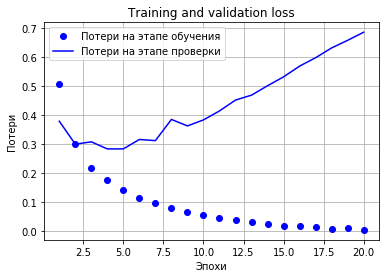

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20+1) # Количество эпох = 20

plt.plot(epochs, loss_values, 'bo', label='Потери на этапе обучения')
plt.plot(epochs, val_loss_values, 'b', label='Потери на этапе проверки')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.show()

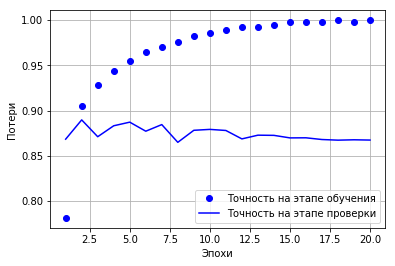

In [25]:
plt.clf()   # Очистить рисунок
acc_values = history_dict['acc']   # значения точности
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Точность на этапе обучения')
plt.plot(epochs, val_acc_values, 'b', label='Точность на этапе проверки')
plt.grid()
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()


В данном случае для предотвращения переобучения можно прекратить обучение после третьей эпохи. 

А теперь обучим новую сеть с нуля в течение четырех эпох и затем оценим получившийся результат на контрольных данных.

In [27]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.1986 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 4s 178us/step


[0.32483660341262816, 0.87284]

Точность достигла 87,28%.

После обучения сети её можно использовать для решения практчиеских задач. Например, попробуем предсказать вероятность того, что отзывы будут положительными, с помощью метода **predict**.

In [28]:
model.predict(x_test)

array([[0.13568099],
       [0.99971026],
       [0.2744856 ],
       ...,
       [0.07046383],
       [0.04249758],
       [0.47223973]], dtype=float32)